# Diabetic Prediction

##   import all the libraries or softwares


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
 
%matplotlib inline   

## Step 1 ---   load the data

In [2]:
df = pd.read_excel('pima-data.xlsx')
df

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,diabetes_orig,skin,has_diabetes,diabetes
0,6,148,72,35,0,33.6,0.627,50,1,1.3790,True,True
1,1,85,66,29,0,26.6,0.351,31,0,1.1426,False,False
2,8,183,64,0,0,23.3,0.672,32,1,0.0000,True,True
3,1,89,66,23,94,28.1,0.167,21,0,0.9062,False,False
4,0,137,40,35,168,43.1,2.288,33,1,1.3790,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0,1.8912,False,False
764,2,122,70,27,0,36.8,0.340,27,0,1.0638,False,False
765,5,121,72,23,112,26.2,0.245,30,0,0.9062,False,False
766,1,126,60,0,0,30.1,0.349,47,1,0.0000,True,True


## Step 2 ---  Cleaning data 

#### 2.a ) check whether any null or NaN values are there or not

In [36]:
df.isnull().values.any() # another code - df.isnull().values.sum()

False

#### 2.b) Checking any coulmns are corelated or not

([<matplotlib.axis.YTick at 0x15b8416c8e0>,
 [Text(0, 0, 'num_preg'),
  Text(0, 1, 'glucose_conc'),
  Text(0, 2, 'diastolic_bp'),
  Text(0, 3, 'thickness'),
  Text(0, 4, 'insulin'),
  Text(0, 5, 'bmi'),
  Text(0, 6, 'diab_pred'),
  Text(0, 7, 'age'),
  Text(0, 8, 'diabetes_orig'),
  Text(0, 9, 'skin'),
  Text(0, 10, 'has_diabetes'),
  Text(0, 11, 'diabetes')])

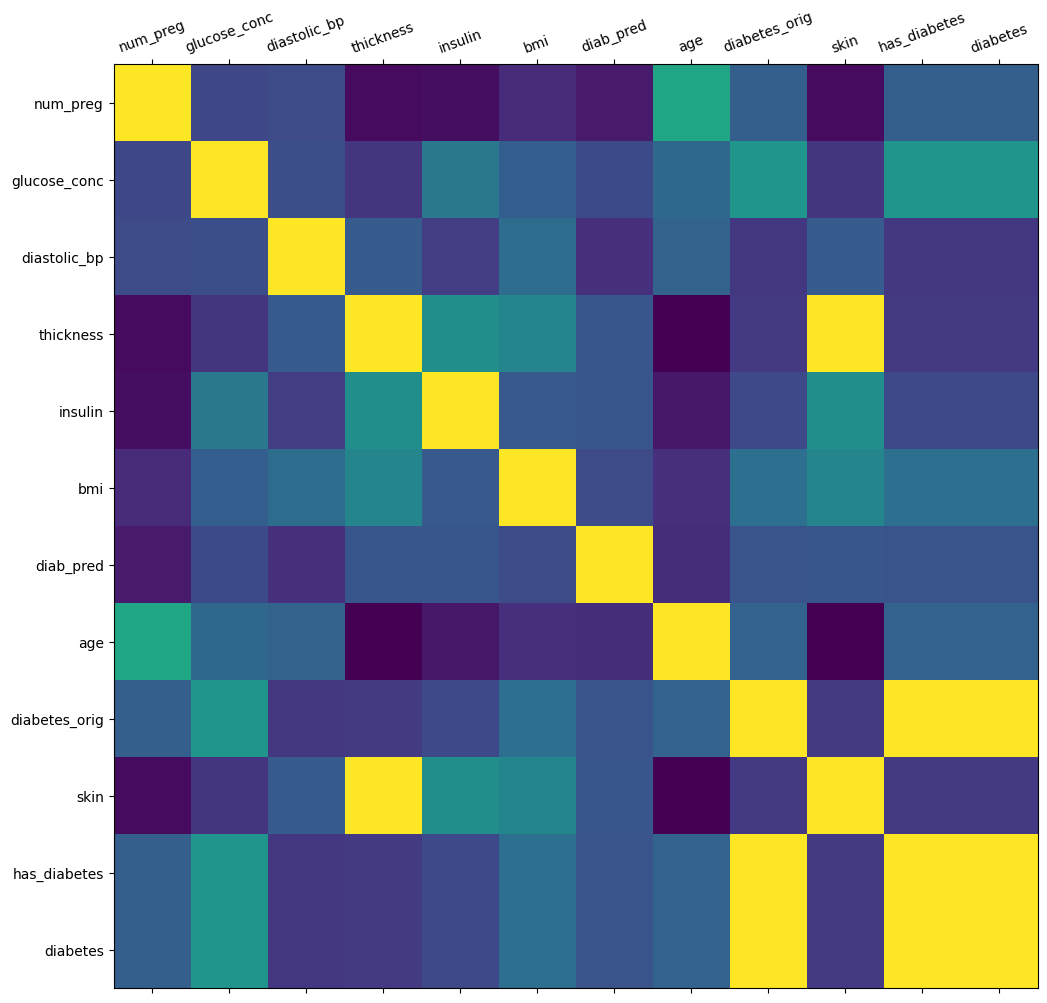

In [4]:
corr = df.corr()
fig,ax = plt.subplots(figsize=(12,12))
ax.matshow(corr)    
plt.xticks(range(len(corr.columns)),corr.columns,rotation=20)
plt.yticks(range(len(corr.columns)),corr.columns)
  

<H3>in correlation matrix </H3>
<p>1) all diagonal columns will be in yellow color</p>
<p>2) apart from diagonal column observe where we are having yellow color or meroon red color any where else</p>

<p fontsize=20px> Here thickness and skin columns are corelated . So remove any one out of these 2 columns.</p>
<p fontsize=20px> Diabetese,Diabetes_org and has_diabetes columns are corelated. So remove any one out of these columns.</p>

In [5]:
df.drop('thickness',axis=1,inplace=True)
df.drop('has_diabetes',axis = 1,inplace=True)
df.drop('diabetes_orig',axis=1,inplace=True)

In [6]:
df.head()

,num_preg,glucose_conc,diastolic_bp,insulin,bmi,diab_pred,age,skin,diabetes
0,6,148,72,0,33.6,0.627,50,1.3790,True
1,1,85,66,0,26.6,0.351,31,1.1426,False
2,8,183,64,0,23.3,0.672,32,0.0000,True
3,1,89,66,94,28.1,0.167,21,0.9062,False
4,0,137,40,168,43.1,2.288,33,1.3790,True


#### 2.c ) ML can't understand the text format data so convert them into integer type 

In [7]:
# Creating a dictionary to convert True to 1 and False to 0
# Want to replace True and false in diabetes columns
dict1 = {
    'diabetes':[True,False]
    
}
# Inplace of True place with 1 and in place of False place with 0
dict2 = {
    'diabetes':[1,0]
        
}

In [8]:
#df['diabetes'] = df['diabetes'].map(dict)

In [9]:
df.replace(dict1,dict2,inplace=True)

In [10]:
df.head(6)

,num_preg,glucose_conc,diastolic_bp,insulin,bmi,diab_pred,age,skin,diabetes
0,6,148,72,0,33.6,0.627,50,1.3790,1
1,1,85,66,0,26.6,0.351,31,1.1426,0
2,8,183,64,0,23.3,0.672,32,0.0000,1
3,1,89,66,94,28.1,0.167,21,0.9062,0
4,0,137,40,168,43.1,2.288,33,1.3790,1
5,5,116,74,0,25.6,0.201,30,0.0000,0


### Checking whether the data is balanced or not 

In [11]:
num_true = len(df.loc[df['diabetes']==0])
num_false = len(df.loc[df['diabetes'] == 1])
print(f'num_true = {num_true}')
print(f'num_false = {num_false}')

per_num_true = (num_true / (num_true+num_false))*100
print(per_num_true)

per_num_false = (num_false/(num_false+num_true))*100
print(per_num_false)

num_true = 500
num_false = 268
65.10416666666666
34.89583333333333


### Splitting Data for training and testing 

In [12]:
from sklearn.model_selection import train_test_split

input_columns = ['num_preg','glucose_conc','diastolic_bp','insulin','bmi','diab_pred','age','skin']
output_columns = ['diabetes']

x = df[input_columns].values
y = df[output_columns].values

spilt_test_size = 0.3

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = spilt_test_size,random_state=42)

In [13]:
# from imblearn.over_sampling import SMOTE
# from collections import Counter
# counter = Counter(y_train.ravel())
# print(counter)
# smt = SMOTE()
# x_train_sm,y_train_sm = smt.fit_resample(x_train,y_train)
# cont = Counter(y_train_sm)
# print(cont)

### Checking how many rows are having missing values 

In [14]:
total_num_preg = len(df.loc[df['num_preg']== 0])
print(f'number of Rows missing in num_preg column is {total_num_preg}')


total_glucose_conc =  len(df.loc[df['glucose_conc']==0])
print(f'number of Rows missing in glucose_conc column is {total_glucose_conc}')

total_diastolic_bp = len(df.loc[df['diastolic_bp']==0])
print(f'number of Rows missing in diastolic_bp column is {total_diastolic_bp}')

total_insulin = len(df.loc[df['insulin']==0])
print(f'number of Rows missing in insulin column is {total_insulin}')

total_bmi = len(df.loc[df['bmi']==0])
print(f'number of Rows missing in bmi column is {total_bmi}')

total_diab_pred = len(df.loc[df['diab_pred']==0])
print(f'number of Rows missing in diab_pred column is {total_diab_pred}')

total_age = len(df.loc[df['age'] ==0])
print(f'number of rows missing in age is {total_age}')

number of Rows missing in num_preg column is 111
number of Rows missing in glucose_conc column is 5
number of Rows missing in diastolic_bp column is 35
number of Rows missing in insulin column is 374
number of Rows missing in bmi column is 11
number of Rows missing in diab_pred column is 0
number of rows missing in age is 0


#### Replacing 0 with mean value or median value

In [15]:
from sklearn.impute import SimpleImputer

fill_zeros = SimpleImputer(missing_values=0,strategy='mean')

x_train = fill_zeros.fit_transform(x_train)
x_test = fill_zeros.fit_transform(x_test)

# Navie Bayes Algorithm
## Training a model


In [16]:
from sklearn.naive_bayes import GaussianNB

In [17]:
nb_model = GaussianNB()   #creating object for GaussianNB Class

nb_model.fit(x_train,y_train.ravel())   # Training a model

GaussianNB()

<p fontsize=22p><i>It will train all the records and find out the accuracy</i> </p>

In [18]:
from sklearn import metrics

nb_predict_model = nb_model.predict(x_train)    # Testing a model

print(f'Predicted accuracy { metrics.accuracy_score(y_train,nb_predict_model) }')  # Accuracy

Predicted accuracy 0.7541899441340782


<p fontsize=25p> Here we are checking for each and every patient.<br> So for first patient the predicted value is matching </p>

In [19]:
first = nb_model.predict([x_train[4]])
print(first)   #predicted result
print(y_train[4])  #actual result

[0]
[0]


In [20]:
(75.41899441340782 *  231) /100

174.21787709497207

## Testing the model

In [21]:
from sklearn import metrics

nb_predict_test = nb_model.predict(x_test)
print(f'Predicted accuracy { metrics.accuracy_score(y_test,nb_predict_test) }')

Predicted accuracy 0.7359307359307359


### Analysing whether this algorithm is good or bad

#If we get more than 68% accuracy we have to use confusion matrix for analysing the algorithm

In [22]:
print(f'{ metrics.confusion_matrix(y_test,nb_predict_test)}')

[[118  33]
 [ 28  52]]


<h3 color='Blue'>Confusion Matrix</h3>
<p fontsize=20> In confusion matrix actual values represented by columns<br>Predicted value represented by rows</p>

<p fontsize=30> So lets see the actual values and predicted values</p>
<p fontsize=25><b><i>Total records = 231</i></b></p>
<table border=1>
    <tr>
        <th>Actual Diabetes Patient</th>
        <th>Actual number of diabetes patient</th>
    </tr>
    <tr>
        <td>118+28 == <b>146</b></td>
        <td>231 - 146 == <b> 85</b></td>
    </tr>
</table>

<table border=1>
    <tr>
        <th>Predicted Diabetes Patient</th>
        <th>Predicted number of diabetes patient</th>
    </tr>
    <tr>
        <td>118+33 == <b>151</b></td>
        <td>231 - 151 == <b> 80</b></td>
    </tr>
</table>

#### When the algorithm is acceptable?

<p fontsize=20>
    <ul>
        <li> When True +ve and True -ve are more </li>
        <li> False +ve and False -ve should be less</li>
        <li> False -ve value should be less compared to False +ve value in general cases</li>
    </ul>
</p>

<p fontsize=20><b> Type-I error is known as False+ve<br> Type-II error is known as False -ve</b></p> 

#### Accuracy Formula == (True+ve + True -ve) / Total Number of records

In [23]:
print( metrics.classification_report(y_test,nb_predict_test))

              precision    recall  f1-score   support

           0       0.81      0.78      0.79       151
           1       0.61      0.65      0.63        80

    accuracy                           0.74       231
   macro avg       0.71      0.72      0.71       231
weighted avg       0.74      0.74      0.74       231



<p fontsize=20><b>positive Precision = TP / (Tp + FP)</b> <br>
    <b>Negative precision = TN / (TN+FN) </b><br>
    <b>Positive Recall = TP / (TP + FN)</b><br>
    <b> Negative Recal = TN / (TN + FP)</b><br>
</p>

## Random Forest algorithm 

In [24]:
from sklearn.ensemble import RandomForestClassifier

## Training a model

In [25]:
rf_model = RandomForestClassifier(random_state=42)  # creating object for RandomForestClassifier class

rf_model.fit(x_train,y_train.ravel())   # Training a machine

RandomForestClassifier(random_state=42)

## Testing a model

In [26]:
scaler = StandardScaler()
scaler.fit(x)
standardized_data = scaler.transform(x)
print(standardized_data)

[[ 0.63994726  0.84832379  0.14964075 ...  0.46849198  1.4259954
   0.90726993]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.36506078 -0.19067191
   0.53090156]
 [ 1.23388019  1.94372388 -0.26394125 ...  0.60439732 -0.10558415
  -1.28821221]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.68519336 -0.27575966
   0.15453319]
 [-0.84488505  0.1597866  -0.47073225 ... -0.37110101  1.17073215
  -1.28821221]
 [-0.84488505 -0.8730192   0.04624525 ... -0.47378505 -0.87137393
   0.65635768]]


In [27]:
 rf_model_test = rf_model.predict(x_test)    # Testing a model
print(f'Accuracy { metrics.accuracy_score(y_test,rf_model_test)}')
# dict = {
#     'num_preg':5,
#     'glucose_conc':6,
#     'diastolic_bp':147,
#     'insulin':72,
#     'bmi':0,
#     'diab_pred':34.6,
#     'age':0.627,
#     'skin':50,
#     'diabetes':1.33790
# }
# rf_model_test = rf_model.predict([[5,6,147,72,0,34.6,0.627,50]])

input_data = [8,183,64,0,23.3,0.672,32,0.0000]

# input_data = [1,89,66,94,28.1,0.16,21,0.9062]

# input_data = [6,148,72,0,33.6,0.627,50,1.3790]
input_data_as_numpy_array = np.asarray(input_data)
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)
# to convert our data into standardized data 
std_data = scaler.transform(input_data_reshaped)
print(std_data)
rf_model_test = rf_model.predict(std_data)
print(rf_model_test)


x_test.shape

Accuracy 0.7532467532467533
[[ 1.23388019  1.94372388 -0.26394125 -0.69289057 -1.10325546  0.60439732
  -0.10558415 -1.28821221]]
[0]


(231, 8)

#### Confusion matrix and classification report

In [28]:
(74.45887445887446 * 231)/100


172.0

## Logistic regression

In [29]:
#Fitting Logistic Regression to the training set  

from sklearn.linear_model import LogisticRegression  

lg_classifier= LogisticRegression(C=0.5,random_state=42,class_weight='balanced')  # Creating object for LogisticcRegression class

lg_classifier.fit(x_train, y_train_sm)   # Training a machine

NameError: name 'y_train_sm' is not defined

In [ ]:
#Predicting the test set result  
y_pred= lg_classifier.predict(x_test)  

print(f'Accuracy = {metrics.accuracy_score(y_test,y_pred)}')   # Accuracy 

print(f'Confusion matrix = \n {metrics.confusion_matrix(y_test,y_pred)}')
print(f'classification report : \n {metrics.classification_report(y_test,y_pred)}')

In [ ]:
(73.59307359307359*231)/100

## Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier()    # Creating a object for DecisionTreeClasssifier

decision_tree.fit(x_train_sm,y_train_sm)   # Training a model

In [ ]:
x_pred = decision_tree.predict(x_test)   # Testing a model

print(f'Accuracy = {metrics.accuracy_score(y_test,x_pred)}')

print(f'Confusion matrix = \n {metrics.confusion_matrix(y_test,x_pred)}')

In [ ]:
(73.59307359307359 * 231) /100

## KNN Algorithm 

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

k_neighbor = KNeighborsClassifier()
k_neighbor.fit(x_train_sm,y_train_sm)

In [ ]:
x_pred = k_neighbor.predict(x_test)

print(f'Accuracy = {metrics.accuracy_score(y_test,x_pred)}')
print(f'Confusion matrix = \n {metrics.confusion_matrix(y_test,x_pred)}')

In [ ]:
(73.59307359307359 * 231) /100

## SVM

In [ ]:
from sklearn.svm import SVC

support = SVC()
support.fit(x_train_sm,y_train_sm)

In [ ]:
x_pred = support.predict(x_test)

print(f'Accuracy = {metrics.accuracy_score(y_test,x_pred)} ')

print(f'Confusion matrix = \n {metrics.confusion_matrix(y_test,x_pred)}')

In [ ]:
(74.02597402597403 * 231) /100